In [125]:
from __future__ import print_function
__author__= 'shelly'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq', 'normal','pois','binomial','geo']

In [127]:
mymean = 100

In [128]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

Text(0.5,0,'mean')

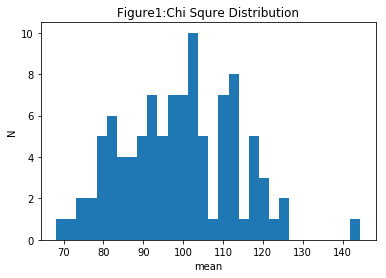

In [129]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.title("Figure1:Chi Squre Distribution")
pl.ylabel('N')
pl.xlabel('mean')

In [130]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.94, standard deviation: 14.08


In [131]:
# mysize = (2000 / (np.array(range(1,101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 2000).astype(int)
mysize = np.linspace(11, 1999, 100, dtype=int)
print (mysize, mysize.shape)

[  11   31   51   71   91  111  131  151  171  191  211  231  251  272
  292  312  332  352  372  392  412  432  452  472  492  513  533  553
  573  593  613  633  653  673  693  713  733  753  774  794  814  834
  854  874  894  914  934  954  974  994 1015 1035 1055 1075 1095 1115
 1135 1155 1175 1195 1215 1235 1256 1276 1296 1316 1336 1356 1376 1396
 1416 1436 1456 1476 1496 1517 1537 1557 1577 1597 1617 1637 1657 1677
 1697 1717 1737 1758 1778 1798 1818 1838 1858 1878 1898 1918 1938 1958
 1978 1999] (100,)


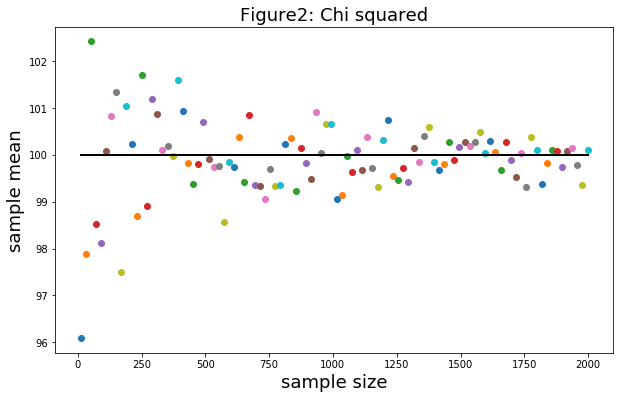

In [132]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

# md is a dictionary, the distibutions in md like md['chisq'] is also a dictionary, so it's a nested dictionary.
# {'chisq': {'size1': array, "size2": array2..., "means": {'size1': size1_mean...}}, 'lnorm': {}}
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    #print (nn)
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Figure2: Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')# the single line

Text(0,0.5,'N')

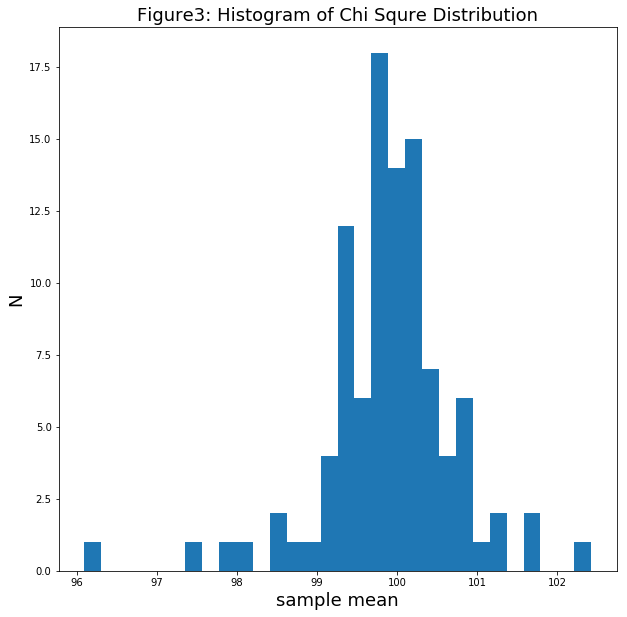

In [133]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Figure3: Histogram of Chi Squre Distribution', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

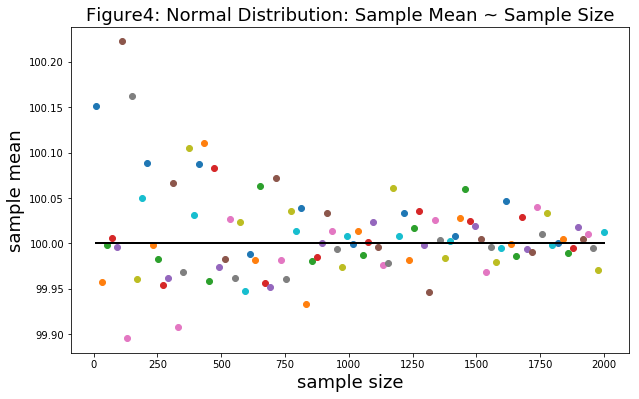

In [134]:
md['normal'] = {} 
mu = mymean

for n in mysize:
    md['normal'][n] = np.random.normal(mu,size=n,scale=1.0)
    
# save the means for plotting later    
md['normal']['means'] = {}
normal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        normal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        normal_mu_n.set_xlabel('sample size', fontsize=18)
        normal_mu_n.set_ylabel('sample mean', fontsize=18)
        normal_mu_n.set_title('Figure4: Normal Distribution: Sample Mean ~ Sample Size', fontsize=18)
        normal_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

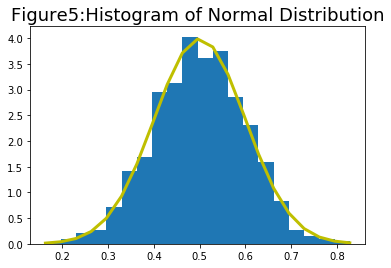

In [135]:
mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=3, color='y')
pl.title('Figure5:Histogram of Normal Distribution', fontsize = 18)
plt.show()

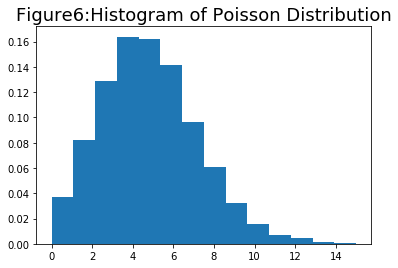

In [136]:
import numpy as np
s = np.random.poisson(5, 10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
pl.title('Figure6:Histogram of Poisson Distribution', fontsize = 18)
plt.show()

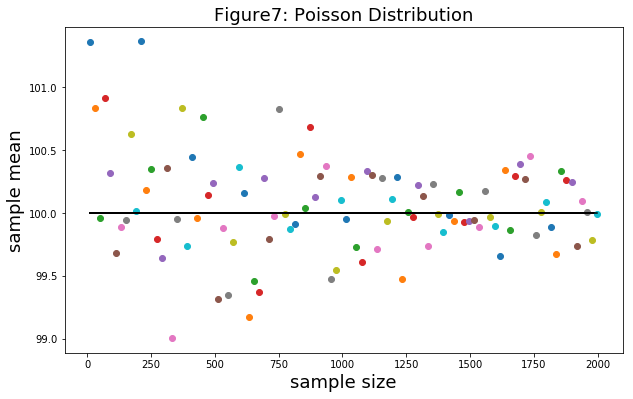

In [137]:
md['pois'] = {} 
lam = mymean
for n in mysize:
    md['pois'][n] = np.random.poisson(lam,size=n)
    
# save the means for plotting later    
md['pois']['means'] = {}
pois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        pois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        pois_mu_n.set_xlabel('sample size', fontsize=18)
        pois_mu_n.set_ylabel('sample mean', fontsize=18)
        pois_mu_n.set_title('Figure7: Poisson Distribution', fontsize=18)
        pois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

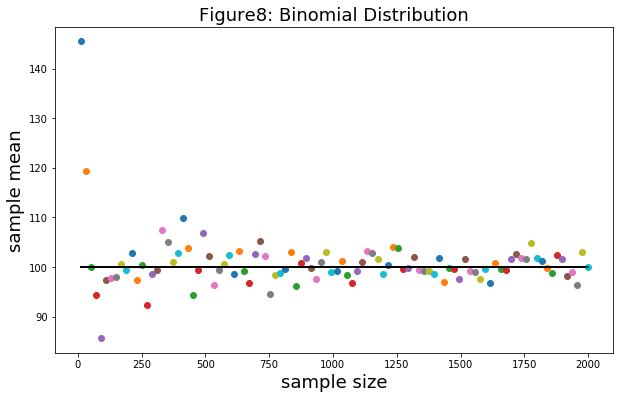

In [140]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = 100*np.random.binomial(5,p=0.2,size=n)
# n*p = mymean, n<N (10<N<2000), p<1 (n is not the samplesize here, n=5 here)
    
# save the means for plotting later    
md['binomial']['means'] = {}
binomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        binomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        binomial_mu_n.set_xlabel('sample size', fontsize=18)
        binomial_mu_n.set_ylabel('sample mean', fontsize=18)
        binomial_mu_n.set_title('Figure8: Binomial Distribution', fontsize=18)
        binomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Figure9: Histogram of Binomial Distribution')

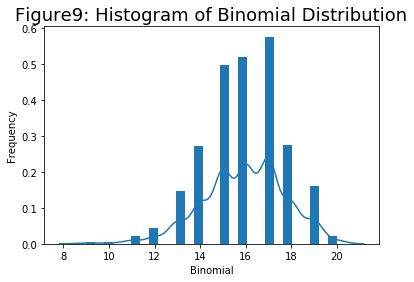

In [145]:
data_binom = binom.rvs(n=20,p=0.8,loc=0,size=1000)
ax = sb.distplot(data_binom,kde=True,hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')
pl.title("Figure9: Histogram of Binomial Distribution", fontsize = 18)

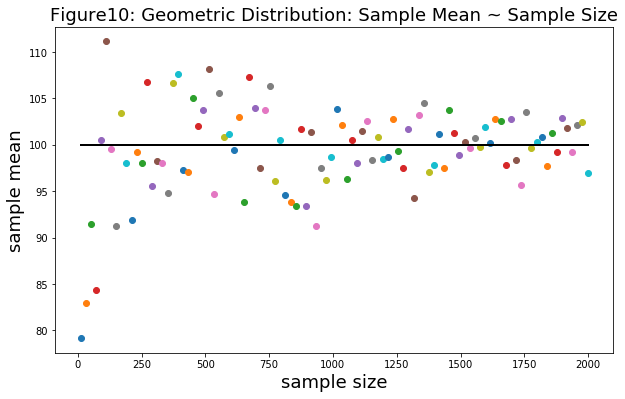

In [146]:
md['geo'] = {} 

for n in mysize:
    md['geo'][n] = np.random.geometric(1/mymean,size=n)
    
# save the means for plotting later    
md['geo']['means'] = {}
geo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geo']:
    if not type(nn) == str:
        md['geo']['means'][nn] = md['geo'][nn].mean()
        #and plot it
        geo_mu_n.plot(nn, md['geo']['means'][nn], 'o')
        geo_mu_n.set_xlabel('sample size', fontsize=18)
        geo_mu_n.set_ylabel('sample mean', fontsize=18)
        geo_mu_n.set_title('Figure10: Geometric Distribution: Sample Mean ~ Sample Size', fontsize=18)
        geo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

Text(0.5,1,"Figure11: Histogram of Geometric Distribution's sample means")

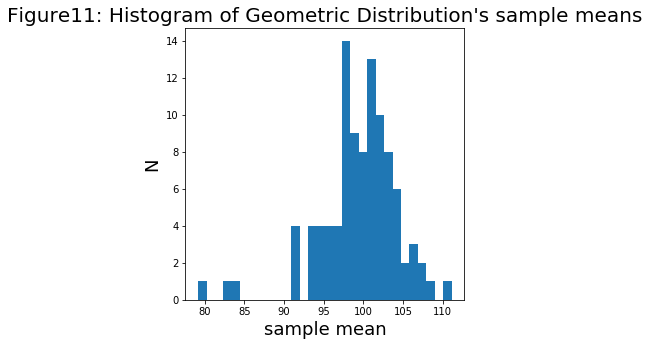

In [147]:
allmeans_geo = list(md['geo']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans_geo,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Figure11: Histogram of Geometric Distribution", fontsize = 18)